In [77]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings
import hvplot.pandas
import numpy as np
import seaborn as sns
#import scipy.stats as stats

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

%matplotlib inline

In [78]:
# Load .env enviroment variables
load_dotenv('.env')

True

# Part 1 - Litecoin and Chainlink Cryptocurrency Analysis

In [79]:
# Set current amount of crypto assets
ltc_shares = 250
chl_shares = 350

tickers = ["LTC", "LINK"]

In [80]:
# Crypto API URLs
ltc_url = "https://api.alternative.me/v2/ticker/Litecoin/?convert=USD"
chl_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=USD"
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

In [81]:
# Fetch current LTC price

response_data_ltc=requests.get(ltc_url)
print(response_data_ltc)
response_content_ltc = response_data_ltc.content
data_ltc = response_data_ltc.json()

#print(json.dumps(data_ltc, indent=4))

ltc_df = data_ltc['data']
#display(ltc_df)

my_ltc=ltc_df['2']['name']

my_ltc_value=ltc_df['2']['quotes']['USD']['price']

# Fetch current CHL price

response_data_chl=requests.get(chl_url)
print(response_data_chl)
response_content_chl = response_data_chl.content
data_chl = response_data_chl.json()

#print(json.dumps(data_chl, indent=4))

chl_df = data_chl['data']

my_chl=chl_df['1975']['name']
# Compute current value of my crpto
# YOUR CODE HERE!
my_chl_value=chl_df['1975']['quotes']['USD']['price']


# Print current crypto wallet balance
print(f"The current value of your {my_ltc} LTC is ${my_ltc_value:0.2f}")
print(f"The current value of your {my_chl} CHL is ${my_chl_value:0.2f}")

<Response [200]>
<Response [200]>
The current value of your Litecoin LTC is $53.47
The current value of your Chainlink CHL is $7.67


In [84]:
# Fetch current BTC price

response_data_btc=requests.get(btc_url)
print(response_data_btc)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()

#print(json.dumps(data_btc, indent=4))

btc_df = data_btc['data']
#display(btc_df)


my_btc=btc_df['1']['name']

my_btc_value=btc_df['1']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

<Response [200]>
The current value of your Bitcoin BTC is $19930.11


In [85]:
# Grant access to get data from Alpaca

alpaca_api_key= os.getenv("ALPACA_API_KEY")

alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")


# Instantiate REST API Connection
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


In [86]:
# Set start and end dates of five years
btc_shares = 200
ticker_btc = ['BTCUSD']
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

# Get current closing prices for Bitcoin

df_btc = api.get_crypto_bars(
    ticker_btc,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize and clean up the Bitcoin DataFrame
BTC = df_btc [df_btc['symbol'] == 'BTCUSD'].drop('symbol', axis=1)
df_btc = df_btc.drop(columns = ['open', 'high', 'low', 'volume', 'trade_count', 'vwap'])
df_btc.index = df_btc.index.date
df_btc


,exchange,close,symbol
2017-09-28,CBSE,4073.20,BTCUSD
2017-09-29,CBSE,4156.99,BTCUSD
2017-09-30,CBSE,4300.97,BTCUSD
2017-10-01,CBSE,4419.99,BTCUSD
2017-10-02,CBSE,4412.43,BTCUSD
...,...,...,...
2022-09-26,ERSX,20065.30,BTCUSD
2022-09-26,FTXU,20048.00,BTCUSD
2022-09-27,CBSE,18764.28,BTCUSD
2022-09-27,ERSX,18768.10,BTCUSD


In [87]:
# Daily return for Bitcoin
daily_return_btc = df_btc['close'].pct_change()
daily_return_btc = daily_return_btc.dropna()
daily_return_btc.head()

2017-09-29    0.020571
2017-09-30    0.034636
2017-10-01    0.027673
2017-10-02   -0.001710
2017-10-03   -0.023592
Name: close, dtype: float64

In [88]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv ("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST (
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2" )

Alpaca key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [89]:
# Set start and end dates of five years
start_date = pd.Timestamp('2017-09-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-28', tz='America/New_York').isoformat()
timeframe = "1Day"

In [90]:
# Get current closing prices for Litcoin and Chainlink

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Generating dataframe for Litcoin and Chainlink
LTC = df_portfolio [df_portfolio ['symbol'] == 'LTC'].drop('symbol', axis=1)
LINK = df_portfolio [df_portfolio ['symbol'] == 'LINK'].drop('symbol', axis=1)
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-09-28 04:00:00+00:00,7.21,7.3788,5.87,6.02,12941,77,6.734449,LINK
2017-09-29 04:00:00+00:00,6.04,6.8795,6.60,6.60,1705,31,6.820661,LINK
2017-10-02 04:00:00+00:00,6.87,6.8700,6.87,6.87,0,0,0.000000,LINK
2017-10-03 04:00:00+00:00,6.87,6.8700,6.87,6.87,0,0,0.000000,LINK
2017-10-04 04:00:00+00:00,6.87,6.8700,6.87,6.87,0,0,0.000000,LINK


In [91]:
# Concatenate the cryptocurrency portfolio DataFrames
df_portfolio_crypto = pd.concat([LTC, LINK],axis=1, keys=['LTC','LINK'])
df_portfolio_crypto.head()

LTC                                           \
                            open   high    low  close  volume trade_count   
timestamp                                                                   
2017-09-28 04:00:00+00:00  46.71  47.00  46.55  46.87  276339        3124   
2017-09-29 04:00:00+00:00  47.00  47.08  46.60  46.98  264392        2733   
2017-10-02 04:00:00+00:00  46.93  47.15  46.62  47.10  199240        2153   
2017-10-03 04:00:00+00:00  47.09  47.28  46.64  47.06  231134        2382   
2017-10-04 04:00:00+00:00  47.09  47.13  46.80  47.00  138603        1745   

                                      LINK                               \
                                vwap  open    high   low close   volume   
timestamp                                                                 
2017-09-28 04:00:00+00:00  46.844259  7.21  7.3788  5.87  6.02  12941.0   
2017-09-29 04:00:00+00:00  46.891042  6.04  6.8795  6.60  6.60   1705.0   
2017-10-02 04:00:00+00:00  46.995466  6.87  6.8700  6.87  6.87      0.0   
2017-10-03 04:00:00+00:00  47.031459  6.87  6.8700  6.87  6.87      0.0   
2017-10-04 04:00:00+00:00  46.999983  6.87  6.8700  6.87  6.87      0.0   

                                                 
                          trade_count      vwap  
timestamp                                        
2017-09-28 04:00:00+00:00        77.0  6.734449  
2017-09-29 04:00:00+00:00        31.0  6.820661  
2017-10-02 04:00:00+00:00         0.0  0.000000  
2017-10-03 04:00:00+00:00         0.0  0.000000  
2017-10-04 04:00:00+00:00         0.0  0.000000

In [92]:
# Create and empty Dataframe for closing prices
df_crypto_price = pd.DataFrame()

# Fetch the closing prices of LTC and LINK
df_crypto_price["LTC"] = df_portfolio_crypto["LTC"]["close"]
df_crypto_price["LINK"] = df_portfolio_crypto["LINK"]["close"]


# Drop the time component of the date
df_crypto_price.index = df_crypto_price.index.date

# Drop the null value for cryptocurrency portfolio
df_crypto_price = df_crypto_price.dropna()
df_crypto_price.head()

,LTC,LINK
2017-09-28,46.87,6.02
2017-09-29,46.98,6.60
2017-10-02,47.10,6.87
2017-10-03,47.06,6.87
2017-10-04,47.00,6.87


In [93]:
# 5 years closed price performance for Litcoin and Chainlink
df_crypto_price.hvplot(
    xlabel='Date',
    ylabel='Closed Price',
    label ='Five Years Performance for Litcoin vs Chainlink'
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

### What are the daily return, standard deviation, covariance/variance and correlation? 

In [94]:
#  Daily Return for both cryptocurrency
df_daily_return_crypto = df_crypto_price.pct_change()
df_daily_return_crypto = df_daily_return_crypto.dropna()
df_daily_return_crypto.head()

,LTC,LINK
2017-09-29,0.002347,0.096346
2017-10-02,0.002554,0.040909
2017-10-03,-0.000849,0.000000
2017-10-04,-0.001275,0.000000
2017-10-05,-0.002766,0.164483


In [95]:
# Mean of closed price for both Litcoin and Chainlink
mean_return_crypto = df_crypto_price.mean()
mean_return_crypto

LTC     41.549158
LINK     6.067718
dtype: float64

In [96]:
# Standard deviation of both Litcoin and Chainlink
standard_dev_crypto = df_daily_return_crypto.std()
standard_dev_crypto

LTC     0.013724
LINK    0.247058
dtype: float64

In [97]:
# Variance for cryptocurrency
variance_crypto = df_daily_return_crypto.var()
variance_crypto

LTC     0.000188
LINK    0.061038
dtype: float64

In [98]:
# Covariance for cryptocurrency
covariance_crypto = df_daily_return_crypto.cov()
covariance_crypto

,LTC,LINK
LTC,0.000188,-0.000460
LINK,-0.000460,0.061038


In [99]:
# Correlation for cryptocurrency
correlation_crypto = df_daily_return_crypto.corr()
correlation_crypto

,LTC,LINK
LTC,1.000000,-0.135676
LINK,-0.135676,1.000000


<AxesSubplot:>

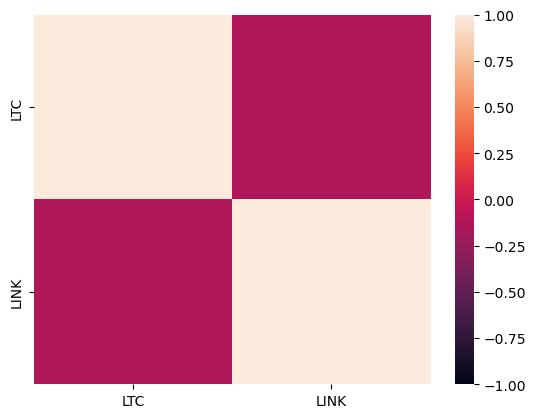

In [100]:
# # Visualize correlation between Litcoin and Chainlink
sns.heatmap(correlation_crypto, vmin=-1, vmax=1)

In [101]:
# Beta for Litcoin
ltc_corvariance = df_daily_return_crypto['LTC'].cov(daily_return_btc)
btc_variance = daily_return_btc.var()
beta_ltc = ltc_corvariance / btc_variance

#beta_ltc
print(f"Beta for Litcoin is {beta_ltc: 2f}%")

Beta for Litcoin is  0.026514%


In [102]:
# Beta for Chainlink
link_corvariance = df_daily_return_crypto['LINK'].cov(daily_return_btc)
btc_variance = daily_return_btc.var()
beta_link = link_corvariance / btc_variance

#beta_ltc
print(f"Beta for Litcoin is {beta_link: 2f}%")

Beta for Litcoin is  0.096701%


In [103]:
# Calculate cumulative return for crptocurrency
crypto_cumulative_returns = (1 + df_daily_return_crypto).cumprod() - 1

crypto_cumulative_returns['LTC'] = crypto_cumulative_returns['LTC'].round(5)
crypto_cumulative_returns['LINK'] = crypto_cumulative_returns['LINK'].round(5)
crypto_cumulative_returns.head()

,LTC,LINK
2017-09-29,0.00235,0.09635
2017-10-02,0.00491,0.14120
2017-10-03,0.00405,0.14120
2017-10-04,0.00277,0.14120
2017-10-05,0.00000,0.32890


In [104]:
# Ploting cummualative return for cryptocurrency
crypto_cumulative_returns.hvplot(xlabel='Year',ylabel='Cumulative Return Percentage', title='Cumulative Return Percentage for Litcoin vs Chainlink')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [105]:
# Annualized Sharpe Ratios for cryptocurrency
annual_sharpe_ratios = (crypto_cumulative_returns.mean()*252) / (crypto_cumulative_returns.std() * np.sqrt(252))
annual_sharpe_ratios

LTC    -17.042971
LINK     0.216329
dtype: float64

In [106]:
# Set initial investment
initial_investment_crypto = 20000

# Set weights
weights_crypto = [0.5, 0.5]

# Calualte the investment on cryptocurrency by weighted daily return
crypto_returns = df_daily_return_crypto.dot(weights_crypto)

# Multiply the initial investment of $10,000 against the portfolio's series of cumulative returns
crypto_cumulative_profits = (initial_investment_crypto * crypto_cumulative_returns)

# Plot the cumulatives return
crypto_cumulative_profits.hvplot(xlabel='Year', ylabel='Investment Profit', title="Profit Performance for Investment on Litcoin and Chainlink")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

From the graph of investment on Litcoin and Chainlink, Chainlink is risky, Litcoin is less risky. We will earn money from Chainlink but we will lose money from Litcoin.

# Part 2 - Apple and Tesla Stock Analysis

In [107]:
# Read the Apple CSV into DataFrame and display a few rows
appl_df = pd.read_csv('AppleData.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
display(appl_df.head())
display(appl_df.tail())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-09-28,$149.84,146691400,$147.64,$150.6414,$144.84
2022-09-27,$151.76,84442740,$152.74,$154.72,$149.945
2022-09-26,$150.77,93339410,$149.66,$153.7701,$149.64
2022-09-23,$150.43,96029910,$151.19,$151.47,$148.56
2022-09-22,$152.74,86652540,$152.38,$154.47,$150.91


,Close/Last,Volume,Open,High,Low
Date,,,,,
2017-10-05,$38.8475,84863480,$38.545,$38.86,$38.5125
2017-10-04,$38.37,80355760,$38.4075,$38.465,$38.115
2017-10-03,$38.62,64867200,$38.5025,$38.7725,$38.4775
2017-10-02,$38.4525,74526160,$38.565,$38.6125,$38.18
2017-09-29,$38.53,104818680,$38.3025,$38.5325,$38


In [108]:
# Drop Volume, Open, High and Low, leave Closed price only
appl_df = appl_df.drop(columns=['Volume', 'Open', 'High', 'Low'])
appl_df = appl_df.sort_index()
appl_df.head()

,Close/Last
Date,
2017-09-29,$38.53
2017-10-02,$38.4525
2017-10-03,$38.62
2017-10-04,$38.37
2017-10-05,$38.8475


In [109]:
# Rename the column name to APPLE
columns = ['APPLE']
appl_df.columns = columns
appl_df['APPLE'] = appl_df['APPLE'].str.replace("$", "")
appl_df['APPLE'] = appl_df['APPLE'].astype("float")
appl_df.head()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_17192\3799585225.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  appl_df['APPLE'] = appl_df['APPLE'].str.replace("$", "")


,APPLE
Date,
2017-09-29,38.5300
2017-10-02,38.4525
2017-10-03,38.6200
2017-10-04,38.3700
2017-10-05,38.8475


In [110]:
# Read the Tesla CSV into DataFrame and display a few rows
tesla_df = pd.read_csv('TeslaData.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
display(tesla_df.head())
display(tesla_df.tail())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-09-28,$287.81,54664810,$283.08,$289,$277.57
2022-09-27,$282.94,61925190,$283.84,$288.67,$277.51
2022-09-26,$276.01,58076910,$271.83,$284.09,$270.31
2022-09-23,$275.33,63748360,$283.09,$284.5,$272.82
2022-09-22,$288.59,70545410,$299.86,$301.29,$285.82


,Close/Last,Volume,Open,High,Low
Date,,,,,
2017-10-05,$23.6887,62518664,$23.7333,$23.829,$23.4233
2017-10-04,$23.6673,122219864,$23.4167,$23.908,$23.3067
2017-10-03,$23.2093,151838174,$22.3933,$23.2367,$22.0853
2017-10-02,$22.7687,78413166,$22.8347,$22.9133,$22.3673
2017-09-29,$22.74,76485727,$22.7907,$22.9787,$22.5734


In [111]:
# Drop Volume, Open, High and Low, leave Closed price only
tesla_df = tesla_df.drop(columns=['Volume', 'Open', 'High', 'Low'])
tesla_df = tesla_df.sort_index()
tesla_df.head()

,Close/Last
Date,
2017-09-29,$22.74
2017-10-02,$22.7687
2017-10-03,$23.2093
2017-10-04,$23.6673
2017-10-05,$23.6887


In [112]:
# Rename the column name to TESLA
columns = ['TESLA']
tesla_df.columns = columns
tesla_df['TESLA'] = tesla_df['TESLA'].str.replace("$", "")
tesla_df['TESLA'] = tesla_df['TESLA'].astype("float")
tesla_df.head()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_17192\1192825064.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_df['TESLA'] = tesla_df['TESLA'].str.replace("$", "")


,TESLA
Date,
2017-09-29,22.7400
2017-10-02,22.7687
2017-10-03,23.2093
2017-10-04,23.6673
2017-10-05,23.6887


In [113]:
# Concatenate the cryptocurrency portfolio DataFrames
df_stock_price = pd.concat([appl_df, tesla_df],axis="columns", join="inner")
df_stock_price.head()

,APPLE,TESLA
Date,,
2017-09-29,38.5300,22.7400
2017-10-02,38.4525,22.7687
2017-10-03,38.6200,23.2093
2017-10-04,38.3700,23.6673
2017-10-05,38.8475,23.6887


In [114]:
df_stock_price.hvplot(
    xlabel='Date',
    ylabel = "Closed Price",
    title="Five Years Stock price for APPLE vs TESLA"
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [115]:
# check if there is null value
df_stock_price.isnull().sum()

APPLE    0
TESLA    0
dtype: int64

In [116]:
# Daily return for Apple and Tesla
daily_return_stock = df_stock_price.pct_change()
daily_return_stock = daily_return_stock.dropna()
daily_return_stock.head()

,APPLE,TESLA
Date,,
2017-10-02,-0.002011,0.001262
2017-10-03,0.004356,0.019351
2017-10-04,-0.006473,0.019733
2017-10-05,0.012445,0.000904
2017-10-06,-0.000579,0.004361


### Standard deviation, variance and covariance for Stocks

In [117]:
# Average closed price for Apple and Tesla
mean_stock = df_stock_price.mean()
mean_stock

# Beta,variance and co-variance
#covariance_stock = daily_return_stock.cov()
#variance_stock = daily_return_stock.var()


APPLE     92.914071
TESLA    123.090802
dtype: float64

In [118]:
# standard deviation of daily return for Apple and Tesla
standard_dev_stock = daily_return_stock.std()
standard_dev_stock

APPLE    0.02042
TESLA    0.04028
dtype: float64

In [119]:
# beta for APPLE and TESLA

#beta_apple = covariance_stock.loc['APPLE', 'TESLA']/variance_stock['TESLA']
#beta_tesla = covariance_stock.loc['APPLE', 'TESLA']/variance_stock['APPLE']
#print(beta_apple , beta_tesla)

In [120]:
# Rename closed price for APPLE
appl_df.rename(columns={'APPLE' : 'close'}, inplace=True)
appl_df= pd.concat([appl_df], axis=1, keys='APPLE')
appl_df.head()

,A
,close
Date,
2017-09-29,38.5300
2017-10-02,38.4525
2017-10-03,38.6200
2017-10-04,38.3700
2017-10-05,38.8475


In [121]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns for APPLE
MC_APPLE = MCSimulation(
    portfolio_data = appl_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 3
)

In [122]:
# Run Morte Carlo Simulation 3 years daily return for APPLE
MC_APPLE.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007812,0.997252,0.994964,1.021768,0.995862,0.982113,1.003594,0.996514,0.976714,0.976121,...,0.976140,1.001458,0.986016,1.019091,1.004842,0.982362,1.019893,0.986179,0.989998,0.986744
2,0.988307,1.030020,1.008540,1.002446,0.989836,0.963249,1.002962,1.041926,0.984507,1.026143,...,1.029235,1.039410,1.001434,1.000605,1.016658,0.956568,0.999579,0.999489,0.990349,0.993675
3,1.003586,1.004534,1.014278,1.006758,1.007094,0.950701,1.038806,1.016816,0.981567,1.048052,...,0.982674,1.093616,0.997009,0.995952,0.984986,0.941444,1.020841,0.975531,0.990484,1.036127
4,0.999388,1.015959,1.035079,1.003695,0.999892,0.950737,1.073042,1.046874,1.003317,1.059763,...,0.970893,1.084005,0.977552,0.986981,0.990916,0.929421,1.016708,0.965549,0.948534,1.085403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2.843155,1.806150,3.296670,3.298550,1.780813,0.364226,4.196091,1.860099,1.345735,3.967209,...,3.845106,2.823171,3.479291,2.829270,3.273355,1.886010,4.251895,0.763995,1.386295,3.951416
753,2.877018,1.723220,3.307873,3.292716,1.813386,0.358145,4.197525,1.882457,1.332540,3.874545,...,3.738638,2.905753,3.464922,2.924988,3.185621,1.858729,4.185584,0.757298,1.352955,3.923999
754,2.853532,1.635785,3.297853,3.147922,1.796471,0.353276,4.191523,1.978072,1.366387,3.951482,...,3.786589,2.748169,3.427559,2.987213,3.179619,1.874411,4.021118,0.741842,1.357037,3.841411
755,2.812469,1.667815,3.246921,3.160138,1.792776,0.358818,4.187529,2.019399,1.401616,3.875568,...,3.734542,2.763032,3.450511,2.905929,3.215993,1.798092,3.863781,0.728645,1.342270,3.748619


In [123]:
# Compute summary statistics from the simulated daily returns for APPLE
simulated_returns_appl = {
    "mean": list(MC_APPLE.simulated_return.mean(axis=1)),
    "median": list(MC_APPLE.simulated_return.median(axis=1)),
    "min": list(MC_APPLE.simulated_return.min(axis=1)),
    "max": list(MC_APPLE.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics for APPLE
appl_simulated_returns = pd.DataFrame(simulated_returns_appl)

# Display sample data
appl_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001056,1.001213,0.936069,1.056977
2,1.001171,1.000144,0.918708,1.083448
3,1.000163,0.998102,0.907685,1.128724
4,1.002176,1.000209,0.901264,1.120337


In [124]:
# Visualize the trajectory of AAPL stock daily returns on 3 years simulation
appl_simulated_returns.hvplot(xlabel = "Number of days cumulated", title="Simulated Daily Returns Behavior of APPL Stock Over the Next Year")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [125]:
# Set initial investment
initial_investment_appl = 10000

# Calulate cumulative statistics data with investment amount for APPLE
cumulative_appl = initial_investment_appl * appl_simulated_returns
cumulative_appl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10010.563183,10012.130540,9360.692540,10569.769520
2,10011.708083,10001.444453,9187.084921,10834.478700
3,10001.634600,9981.018799,9076.845386,11287.241494
4,10021.761650,10002.094629,9012.639171,11203.369444


In [126]:
# Create a chart of the simulated profits/losses for Apple
appl_plot = cumulative_appl.hvplot(
    xlabel="Number of days cumulated", 
    title="Simulated Outcomes Behavior of APPL Stock Over the Next Three Year",
).opts(
    yformatter="%.0f"
)
appl_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [127]:
# Summarize statistics from the Monte Carlo Simulation results
tbl_appl = MC_APPLE.summarize_cumulative_return()
print(tbl_appl)

count           500.000000
mean              2.631758
std               1.480661
min               0.361213
25%               1.621611
50%               2.317110
75%               3.388499
max              10.124580
95% CI Lower      0.745320
95% CI Upper      6.693788
Name: 756, dtype: float64


C:\Users\Ivan\Desktop\Cindy\Crypto-Tickers-Project-1\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [128]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes with $10,000 investments in APPLE stocks
ci_lower = round(tbl_appl[8]*initial_investment_appl,2)
ci_upper = round(tbl_appl[9]*initial_investment_appl,2)
print(f"There is a 95% chance that an initial investment of $10,000 in APPLE stock"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in APPLE stock over the next year will end within in the range of $7453.2 and $66937.88.


In [129]:
# Rename closed price for TESLA
tesla_df.rename(columns={'TESLA' : 'close'}, inplace=True)
tesla_df= pd.concat([tesla_df], axis=1, keys='TESLA')
tesla_df.head()

,T
,close
Date,
2017-09-29,22.7400
2017-10-02,22.7687
2017-10-03,23.2093
2017-10-04,23.6673
2017-10-05,23.6887


In [130]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns for TESLA
MC_TESLA = MCSimulation(
    portfolio_data = tesla_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 3
)

In [131]:
# Run Morte Carlo Simulation 3 years daily return for TESLA
MC_TESLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.948718,0.948579,1.054431,1.066742,1.011994,0.995587,1.030978,0.970118,1.019988,1.033781,...,1.046795,1.035424,1.022425,1.006300,1.069451,1.020111,1.038974,0.977197,0.908751,1.015135
2,0.920211,0.982530,1.136469,0.973230,1.015362,1.067768,1.058218,1.008935,1.093018,1.098542,...,0.997114,0.968296,1.053948,0.989156,1.119202,0.976789,1.014200,0.990538,0.912549,0.995860
3,0.900668,1.010904,1.173532,1.001898,1.036964,1.099512,1.033766,1.008907,1.015180,1.073280,...,1.078747,0.956747,1.063773,1.007323,1.135057,0.993644,1.002366,1.009649,0.903823,0.931266
4,0.975829,1.043277,1.229445,0.910894,0.992721,1.136188,1.039609,1.049114,1.064176,1.111792,...,1.050961,0.997967,1.062869,0.887811,1.121279,1.099451,1.015399,0.968856,0.916338,0.910219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.468174,2.741930,10.060041,82.817999,4.716878,7.902967,1.718254,0.402328,8.419239,1.075568,...,6.344800,10.887174,0.305524,6.278460,12.677971,7.434157,11.329722,4.881635,7.654355,3.449845
753,1.543770,2.895690,10.651561,83.536265,4.729013,8.006593,1.796874,0.387051,9.330813,1.069407,...,6.301219,11.409918,0.321658,6.602140,12.988893,7.563987,11.139567,4.782076,7.872059,3.439374
754,1.571214,2.932487,10.521558,81.716287,4.408111,7.804151,1.876272,0.379574,9.444047,1.051600,...,5.894442,11.190712,0.350217,6.503575,13.931592,7.646351,11.986253,4.601989,7.675265,3.419965
755,1.546530,2.788779,9.756586,83.101728,4.422584,7.708342,1.813412,0.375023,8.947887,1.016764,...,6.261044,11.413252,0.343873,6.485248,14.083302,7.472151,11.911536,4.500980,7.763598,3.401394


In [132]:
# Compute summary statistics from the simulated daily returns for TESLA
simulated_returns_tesla = {
    "mean": list(MC_TESLA.simulated_return.mean(axis=1)),
    "median": list(MC_TESLA.simulated_return.median(axis=1)),
    "min": list(MC_TESLA.simulated_return.min(axis=1)),
    "max": list(MC_TESLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics for TESLA
tesla_simulated_returns = pd.DataFrame(simulated_returns_tesla)
tesla_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000787,1.000121,0.872419,1.108753
2,1.004416,1.006274,0.828892,1.214209
3,1.009203,1.006589,0.813989,1.271577
4,1.013851,1.012856,0.801646,1.329936


In [133]:
# Create a chart of the simulated profits/losses for TESLA
tesla_simulated_returns.hvplot(
    xlabel = "Number of days cumulated", 
    label="Simulated Daily Returns Behavior of APPL Stock Over the Next Year"
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [134]:
# Set initial investment
initial_investment_tesla = 10000

# Calulate cumulative statistics data with investment amount for TESLA
cumulative_tesla = initial_investment_tesla * tesla_simulated_returns
cumulative_tesla.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10007.868982,10001.211213,8724.194670,11087.528960
2,10044.156529,10062.744417,8288.921372,12142.089412
3,10092.030800,10065.892752,8139.887423,12715.770482
4,10138.506769,10128.558315,8016.457160,13299.361564


In [136]:
# Create a chart of the simulated profits/losses for TESLA
tesla_plot = cumulative_tesla.hvplot(
    xlabel="Number of days cumulated", 
    label="Simulated Outcomes Behavior of TESLA Stock Over the Next Three Year",
).opts(
    yformatter="%.0f"
)
tesla_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [137]:
# Summarize statistics from the Monte Carlo Simulation results
tbl_tesla = MC_TESLA.summarize_cumulative_return()
print(tbl_tesla)

count           500.000000
mean              8.041542
std              10.647998
min               0.090738
25%               2.217034
50%               4.634172
75%               9.043577
max              88.700982
95% CI Lower      0.456771
95% CI Upper     41.989774
Name: 756, dtype: float64


C:\Users\Ivan\Desktop\Cindy\Crypto-Tickers-Project-1\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [138]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes with $10,000 investments in APPLE stocks
ci_lower_tesla = round(tbl_tesla[8]*initial_investment_tesla,2)
ci_upper_tesla = round(tbl_tesla[9]*initial_investment_tesla,2)
print(f"There is a 95% chance that an initial investment of $10,000 in APPLE stock"
      f" over the next year will end within in the range of"
      f" ${ci_lower_tesla} and ${ci_upper_tesla}.")

There is a 95% chance that an initial investment of $10,000 in APPLE stock over the next year will end within in the range of $4567.71 and $419897.74.


In [139]:
# Compare two plots to visualize both APPLE and TESLA simulated outcomes
appl_plot + tesla_plot

:Layout
   .NdOverlay.I                                                                   :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.Simulated_Outcomes_Behavior_of_TESLA_Stock_Over_the_Next_Three_Year :NdOverlay   [Variable]
      :Curve   [index]   (value)

According to the assumption of investment for Apple and Tesla, we can forcast that Tesla can bring more profit for us with same amount of invesment.

## Part 3 - Combined Portfolio of cryptocurrency and stock

In [140]:
# Combine cryptocurrency and stock to a portfolio
df_portfolio_all = pd.concat([df_crypto_price, df_stock_price], axis="columns")
df_portfolio_all = df_portfolio_all.dropna()
df_portfolio_all.head()

C:\Users\Ivan\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3809: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  indexer = self._engine.get_indexer(tgt_values)


,LTC,LINK,APPLE,TESLA
2017-09-29,46.98,6.60,38.5300,22.7400
2017-10-02,47.10,6.87,38.4525,22.7687
2017-10-03,47.06,6.87,38.6200,23.2093
2017-10-04,47.00,6.87,38.3700,23.6673
2017-10-05,46.87,8.00,38.8475,23.6887


In [141]:
# Plot price movement for portfolio
df_portfolio_all.hvplot(
    xlabel='Date',
    ylabel='Closed Price',
    title='Closed Price Performance of Portfolio'
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [142]:
# Daily return of portfolio
daily_return_all = df_portfolio_all.pct_change()
daily_return_all = daily_return_all.dropna()
daily_return_all.head()

,LTC,LINK,APPLE,TESLA
2017-10-02,0.002554,0.040909,-0.002011,0.001262
2017-10-03,-0.000849,0.000000,0.004356,0.019351
2017-10-04,-0.001275,0.000000,-0.006473,0.019733
2017-10-05,-0.002766,0.164483,0.012445,0.000904
2017-10-06,0.001067,0.000000,-0.000579,0.004361


In [143]:
# set the weights of investment for portfolio
weights = [0.2,0.3, 0.4, 0.6]

portfolio_returns = daily_return_all.dot(weights)
portfolio_returns.head()

2017-10-02    0.012736
2017-10-03    0.013183
2017-10-04    0.008996
2017-10-05    0.054312
2017-10-06    0.002598
dtype: float64

In [144]:
# Calculate cumulative portfolio returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

2017-10-02    0.012736
2017-10-03    0.026087
2017-10-04    0.035318
2017-10-05    0.091548
2017-10-06    0.094384
dtype: float64

In [145]:
# Plot cumulative portfolio returns
cumulative_returns.hvplot(
    xlabel='Date',
    ylabel='Percentage cumulative returns',
    title='Portfolio Cumulative Returns Performance'
)

:Curve   [index]   (0)

In general, our portfolio is making profit. However, cumulative returns after 2021 has significant fluctutation